In [1]:
# Optimal Time Flight Data

Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv('trainable_complete2.xls')

In [4]:
df1.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6


Airline: Name of the airline used for traveling

Cabin: The type of service i.e. economy, business class and premium economy

weekday: number of weekdays the flight is operational 

Dept_city: Starting location of flight, souce of the flight

arrival_city: Ending location of flight, destination of the flight

departure_time: Departure time of flight from starting location

arrival_time: Arrival time of flight at destination

duration: Duration of flight in minutes

stops: Number of total stops flight took before landing at the destination.

Price: Price of the flight

Dept_flights_time: time of the day the flight usually takes place

dept_hours: 

Dept_date:

optimal_hours:

In [5]:
print(df1.shape)

(330938, 14)


There are 14 columns and 330938 rows

# Exploring the contents of data

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330938 entries, 0 to 330937
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              330938 non-null  int64 
 1   departure_time     330938 non-null  object
 2   arrival_time       330938 non-null  object
 3   Airline            330938 non-null  object
 4   Cabin              330938 non-null  object
 5   Dept_city          330938 non-null  object
 6   Dept_date          330938 non-null  int64 
 7   arrival_city       330938 non-null  object
 8   stops              330938 non-null  int64 
 9   duration           330938 non-null  int64 
 10  weekday            330938 non-null  int64 
 11  dept_hours         330938 non-null  int64 
 12  Dept_flights_time  330938 non-null  object
 13  optimal_hours      330938 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 35.3+ MB


In [7]:
df1.describe()

,Price,Dept_date,stops,duration,weekday,dept_hours,optimal_hours
count,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000
mean,14074.894817,16.713064,1.278974,590.186636,2.902087,12.602539,12.568575
std,15968.136248,8.166245,0.802891,364.512309,2.088561,4.848977,6.882780
min,1579.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5450.000000,10.000000,1.000000,325.000000,1.000000,9.000000,7.000000
50%,7559.000000,17.000000,1.000000,515.000000,3.000000,12.000000,13.000000
75%,11742.000000,24.000000,2.000000,845.000000,5.000000,16.000000,18.000000
max,115432.000000,31.000000,6.000000,1435.000000,6.000000,23.000000,23.000000


In [8]:
df1['Airline'].unique()

array(['AirAsia', 'Go Air', 'IndiGo', 'Air India', 'Spicejet', 'Vistara',
       'Vistara, IndiGo', 'Spicejet, IndiGo', 'IndiGo, Air India',
       'Vistara, Air India', 'Air India, IndiGo', 'IndiGo, AirAsia',
       'AirAsia, IndiGo', 'IndiGo, Spicejet', 'AirAsia, Go Air',
       'AirAsia, Spicejet', 'AirAsia, Air India', 'Air India, Spicejet',
       'Go Air, IndiGo', 'Air India, Vistara', 'Spicejet, Air India',
       'Go Air, Air India', 'IndiGo, Go Air', 'Go Air, Spicejet',
       'Go Air, AirAsia', 'Air India, Go Air', 'Air India, AirAsia',
       'Vistara, Go Air', 'Vistara, AirAsia', 'TruJet, IndiGo',
       'IndiGo, Vistara', 'TruJet, Vistara', 'AirAsia, Vistara',
       'Vistara, Spicejet', 'Go Air, Vistara', 'Spicejet, Vistara',
       'Spicejet, Go Air', 'Spicejet, AirAsia', 'IndiGo, TruJet',
       'flybig, Air India', 'flybig, Spicejet', 'flybig, IndiGo',
       'flybig, Go Air', 'TruJet, Air India'], dtype=object)

This data is extremely distorted and hence requires cleaning.
Split the data into two airline columns i.e. ailine1 and airline 2

In [9]:
df1['Dept_city'].unique()

array(['New Delhi', 'Mumbai', 'Bengaluru', 'Hyderabad', 'Chennai',
       'Kolkata', 'Kochi', 'Goa', 'Pune', 'Guwahati', 'Lucknow', 'Jaipur',
       'Patna', 'Thiruvananthapuram', 'Bhubaneswar', 'Kozhikode',
       'Bagdogra', 'Nagpur', 'Varanasi', 'Indore', 'Coimbatore',
       'Srinagar', 'Visakhapatnam', 'Ranchi', 'Amritsar', 'Chandigarh',
       'Raipur', 'Mangalore', 'Port Blair', 'Tiruchirappalli'],
      dtype=object)

In [10]:
df1['Cabin'].unique()

array(['E', 'B', 'PE'], dtype=object)

In [11]:
df1['Dept_date'].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  5],
      dtype=int64)

# Data Cleaning and modification

In [12]:
df1[['Airline1','Airline2']] = df1['Airline'].str.split(',', expand=True)
df1.drop(columns = ['Airline'], inplace = True)

In [13]:
df1.head()

,Price,departure_time,arrival_time,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,Airline1,Airline2
0,3112,14:30,20:20,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11,AirAsia,None
1,3113,16:55,21:10,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13,Go Air,None
2,3113,16:45,21:05,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13,Go Air,None
3,3113,07:55,13:00,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4,Go Air,None
4,3113,09:00,14:20,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6,Go Air,None


Cleaning the distorted data of Airlines columns by splitting the multivalued rows into two columns.

Handling Time Variables

In [14]:
df1["Dep_hour"] = pd.to_datetime(df1["departure_time"]).dt.hour
df1["Dep_mins"] = pd.to_datetime(df1["departure_time"]).dt.minute

df1["Arrival_hour"] = pd.to_datetime(df1.arrival_time).dt.hour
df1["Arrival_mins"] = pd.to_datetime(df1.arrival_time).dt.minute

In [15]:
df1.head()

,Price,departure_time,arrival_time,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,Airline1,Airline2,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
0,3112,14:30,20:20,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11,AirAsia,None,14,30,20,20
1,3113,16:55,21:10,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13,Go Air,None,16,55,21,10
2,3113,16:45,21:05,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13,Go Air,None,16,45,21,5
3,3113,07:55,13:00,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4,Go Air,None,7,55,13,0
4,3113,09:00,14:20,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6,Go Air,None,9,0,14,20


# Handle Missing Values

In [16]:
(df1.isnull().sum()/df1.shape[0])*100

Price                 0.000000
departure_time        0.000000
arrival_time          0.000000
Cabin                 0.000000
Dept_city             0.000000
Dept_date             0.000000
arrival_city          0.000000
stops                 0.000000
duration              0.000000
weekday               0.000000
dept_hours            0.000000
Dept_flights_time     0.000000
optimal_hours         0.000000
Airline1              0.000000
Airline2             84.856076
Dep_hour              0.000000
Dep_mins              0.000000
Arrival_hour          0.000000
Arrival_mins          0.000000
dtype: float64

Approximately 89% of the data in Airline2 is missing after splitting the column Airline

In [17]:
df1.shape

(330938, 19)

In [18]:
df1['Airline2']=df1["Airline2"].fillna(df1["Airline1"])

In [19]:
(df1.isnull().sum()/df1.shape[0])*100

Price                0.0
departure_time       0.0
arrival_time         0.0
Cabin                0.0
Dept_city            0.0
Dept_date            0.0
arrival_city         0.0
stops                0.0
duration             0.0
weekday              0.0
dept_hours           0.0
Dept_flights_time    0.0
optimal_hours        0.0
Airline1             0.0
Airline2             0.0
Dep_hour             0.0
Dep_mins             0.0
Arrival_hour         0.0
Arrival_mins         0.0
dtype: float64

# Data Visualization

<AxesSubplot:xlabel='Dept_flights_time', ylabel='count'>

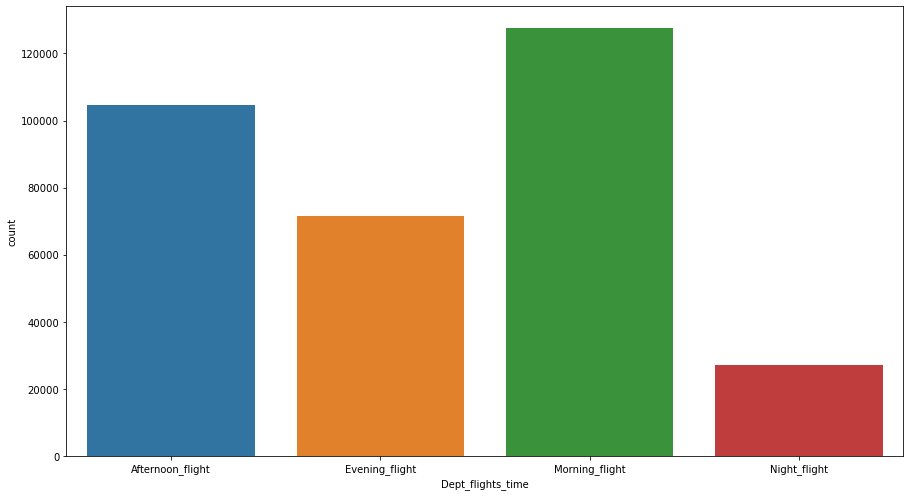

In [20]:
rcParams['figure.figsize'] = 15.0,8.27
sns.countplot(df1['Dept_flights_time'])

This graph shows the number of flights taken at different times of the day. Morning flights are the greatest followed by afternoon flights, evening flights and the least flights are taken off at night.

<AxesSubplot:xlabel='Cabin', ylabel='count'>

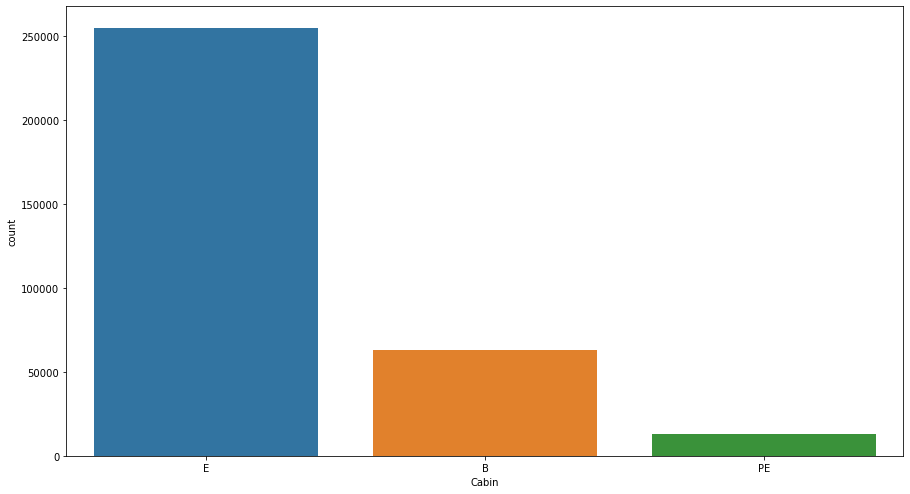

In [21]:
sns.countplot(df1['Cabin'])

Economy class is the most preferred one

In [22]:
df1['Dept_city'].value_counts()

New Delhi             21849
Mumbai                19875
Bengaluru             17575
Hyderabad             16565
Kolkata               16309
Chennai               15200
Patna                 13472
Srinagar              13063
Goa                   12870
Lucknow               12601
Guwahati              12168
Amritsar              11833
Kochi                 11326
Pune                  10898
Jaipur                10652
Varanasi              10525
Bhubaneswar           10493
Bagdogra              10340
Chandigarh             9441
Ranchi                 9426
Visakhapatnam          9270
Indore                 8549
Raipur                 8469
Nagpur                 7485
Port Blair             7362
Mangalore              6842
Coimbatore             6284
Thiruvananthapuram     5440
Kozhikode              2854
Tiruchirappalli        1902
Name: Dept_city, dtype: int64

<AxesSubplot:xlabel='Dept_city', ylabel='count'>

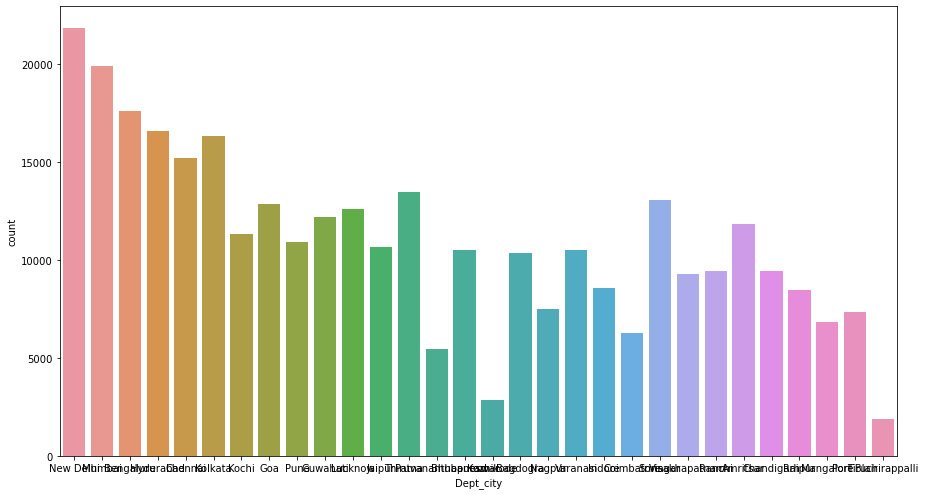

In [23]:
sns.countplot(df1['Dept_city'])

<AxesSubplot:xlabel='Airline1', ylabel='count'>

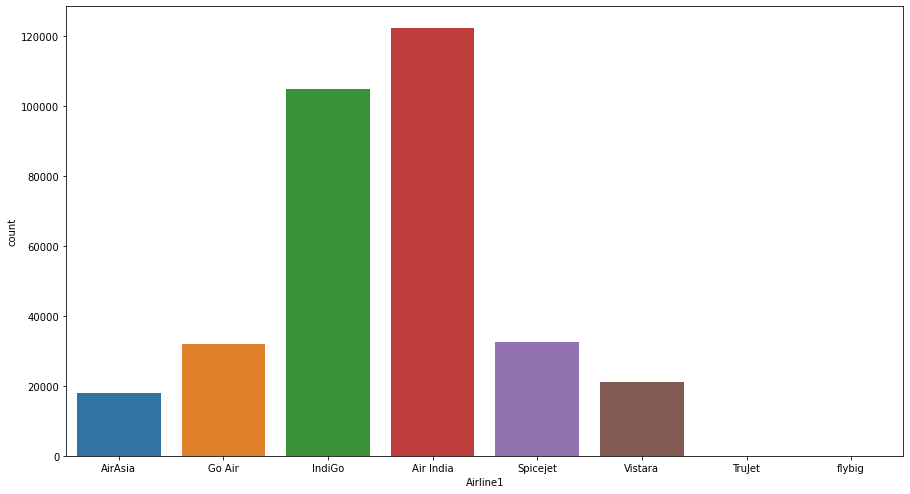

In [24]:
sns.countplot(df1['Airline1'])

<AxesSubplot:xlabel='Airline2', ylabel='count'>

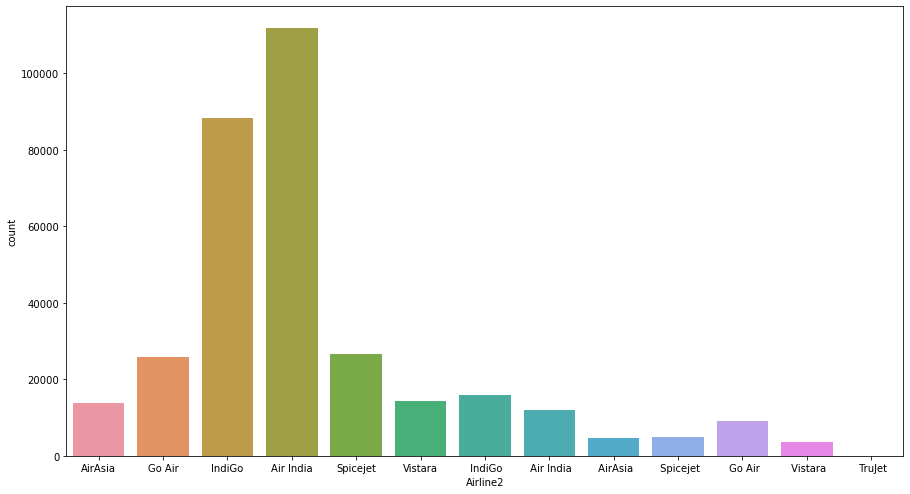

In [25]:
sns.countplot(df1['Airline2'])

<AxesSubplot:xlabel='Price'>

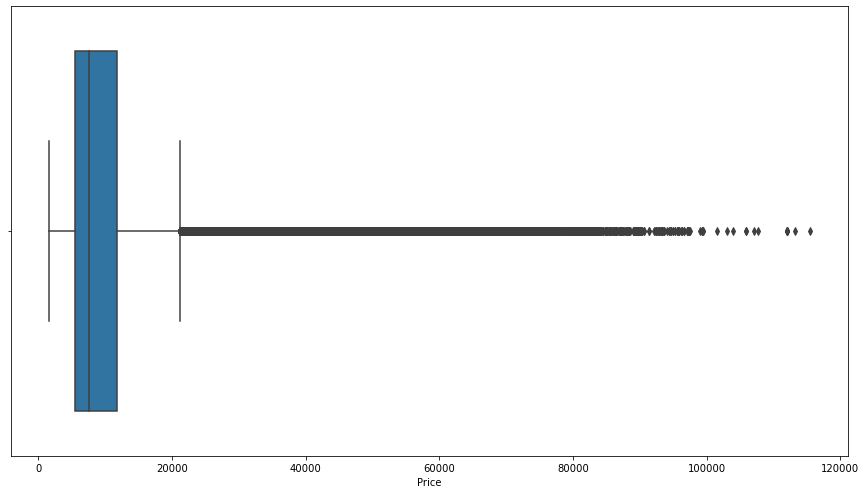

In [26]:
sns.boxplot(df1['Price'])

There are extreme outliers present in the price data

# Bivariate Analysis

How the Airline variable is related to the Price variable.

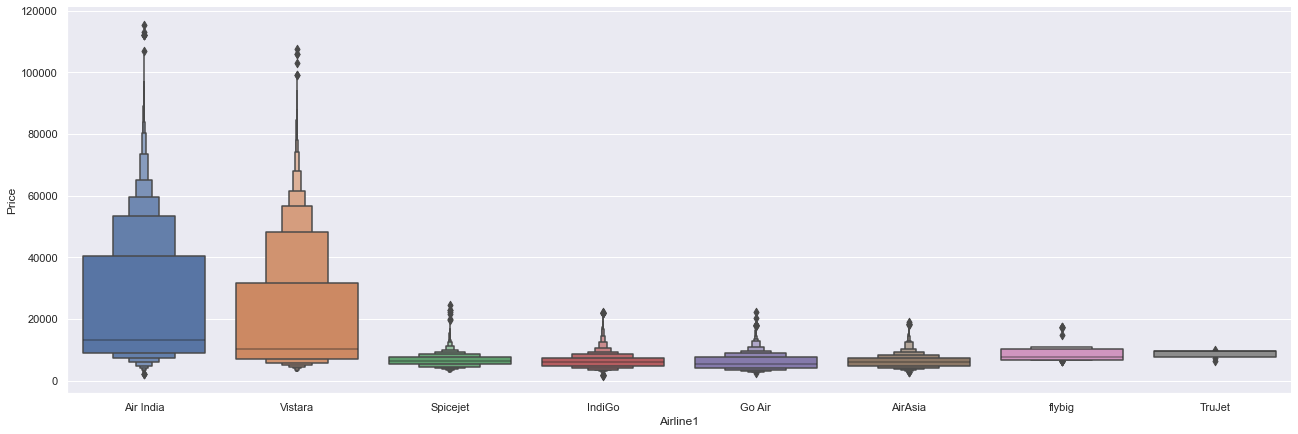

In [27]:
sns.set()
sns.catplot(y = "Price", x = "Airline1", data = df1.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Especially for the Airlines like ArIndia and Vistara we can see that the data has a lot of abnormality

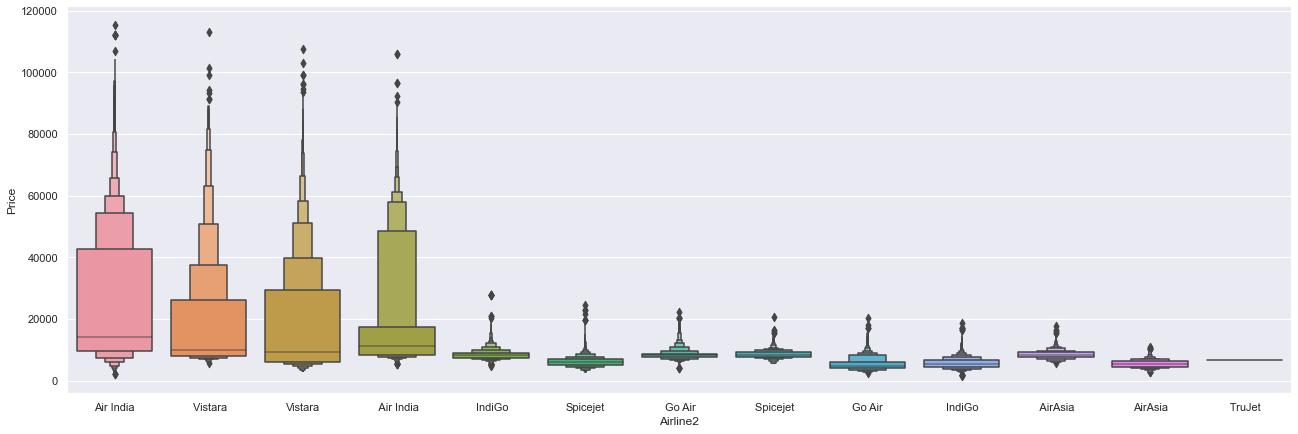

In [28]:
sns.set()
sns.catplot(y = "Price", x = "Airline2", data = df1.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# check the distribution of the data

In [29]:
df1.skew()

Price            2.120696
Dept_date       -0.016088
stops            0.837965
duration         0.516965
weekday          0.034272
dept_hours       0.249803
optimal_hours   -0.265833
Dep_hour         0.249803
Dep_mins         0.077710
Arrival_hour    -0.229559
Arrival_mins     0.017710
dtype: float64

_The variables with skewness > 1 such as wheelbase, compressionratio, horsepower, price are highly positively skewed.

_The variables with skewness < -1 are highly negatively skewed.

_The variables with 0.5 < skewness < 1 such as carwidth, curbweight, citympg are moderately positively skewed.

_The variables with -0.5 < skewness < -1 such as stroke are moderately negatively skewed.

And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed such as symboling, carheight, boreration, peakrpm, highwaympg.

In [31]:

def plot_dist(df1,col):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    sns.distplot(df1[col], fit=norm)
    plt.subplot(1,2,2)
    stats.probplot(df1[col], plot=plt)
    plt.show()

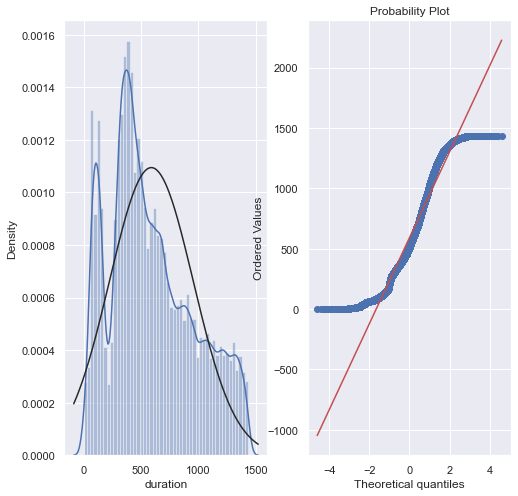

In [32]:
plot_dist(df1,'duration')

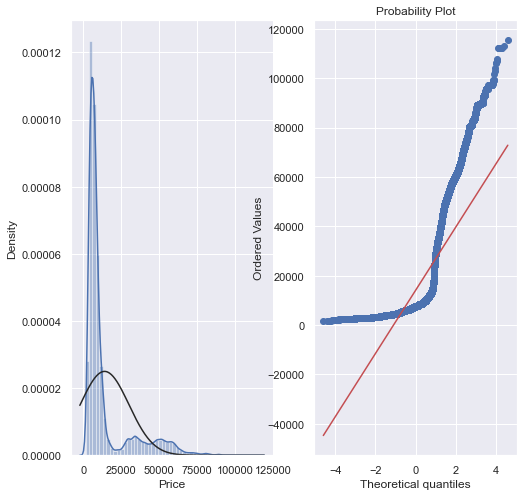

In [33]:
plot_dist(df1,'Price')

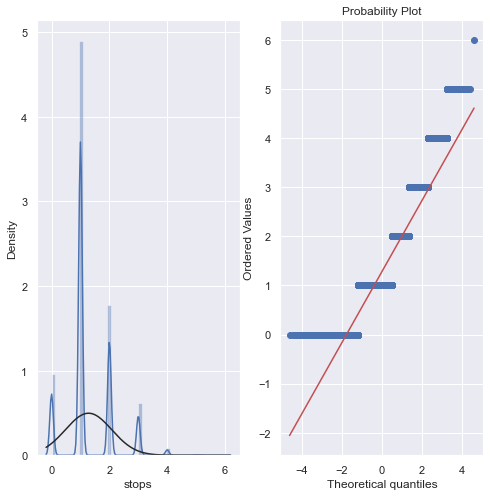

In [34]:
plot_dist(df1,'stops')

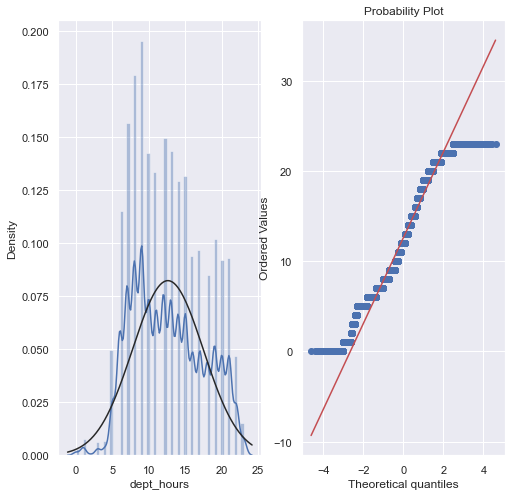

In [35]:
plot_dist(df1,'dept_hours')

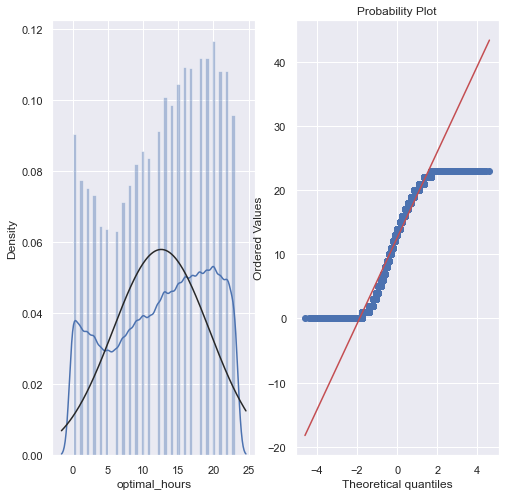

In [36]:
plot_dist(df1,'optimal_hours')

transforming the columns with normal distribution using the logg techniqe

In [37]:
df1['Price']=np.log(df1['Price'])


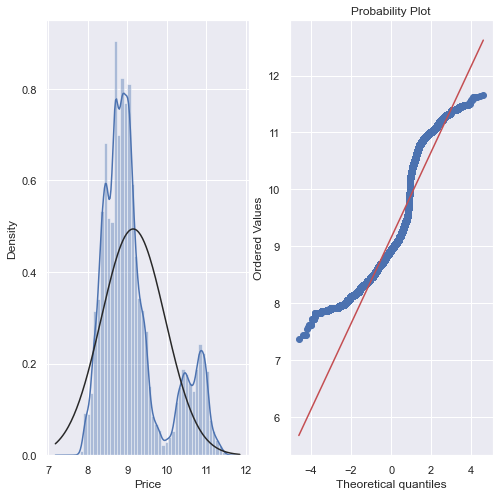

In [38]:
plot_dist(df1, 'Price')

# Feature Engineering

In [39]:
df1.describe()

,Price,Dept_date,stops,duration,weekday,dept_hours,optimal_hours,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
count,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000
mean,9.146264,16.713064,1.278974,590.186636,2.902087,12.602539,12.568575,12.602539,26.543310,14.549160,27.606848
std,0.807699,8.166245,0.802891,364.512309,2.088561,4.848977,6.882780,4.848977,17.637922,5.277104,16.734160
min,7.364547,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.603371,10.000000,1.000000,325.000000,1.000000,9.000000,7.000000,9.000000,10.000000,10.000000,15.000000
50%,8.930494,17.000000,1.000000,515.000000,3.000000,12.000000,13.000000,12.000000,25.000000,15.000000,25.000000
75%,9.370927,24.000000,2.000000,845.000000,5.000000,16.000000,18.000000,16.000000,40.000000,19.000000,40.000000
max,11.656437,31.000000,6.000000,1435.000000,6.000000,23.000000,23.000000,23.000000,55.000000,23.000000,55.000000


Ideal Ranges for the numerical data:

1. Price <= 50000
2. 1<= Dept_date <= 31
3. 0<= stops <= 6
4. duration != 0 
5. 0<= weekday <= 7
6. 0<= dept_hours <= 23
7. 0<= optimal_hours <= 23
8. 0<= Dep_hour <= 23
9. 0<= Dep_mins <= 59
10. 0<= Arrival_hour <= 23
11. 0<= Arrival_mins <= 59

Dropping unnecessary columns

In [40]:
df1 = df1.drop(columns = ['departure_time','arrival_time'])

In [41]:
features = []
for i in df1.columns:
    if df1[i].dtypes == 'int64':
        features.append(i)
features

['Dept_date',
 'stops',
 'duration',
 'weekday',
 'dept_hours',
 'optimal_hours',
 'Dep_hour',
 'Dep_mins',
 'Arrival_hour',
 'Arrival_mins']

In [42]:
def remove_outliers(df, col):
    Q1 = np.percentile(df[col], 25,interpolation = 'midpoint')
    Q3 = np.percentile(df[col], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    # Upper bound
    upper = (Q3+1.5*IQR)
    # Lower bound
    lower = (Q1-1.5*IQR)
    return lower,upper

In [43]:
lower, upper = remove_outliers(df1,'Price')
df1['Price']=np.where(df1['Price']>upper,upper,df1['Price'])
df1['Price']=np.where(df1['Price']<lower,lower,df1['Price'])

<AxesSubplot:xlabel='Price'>

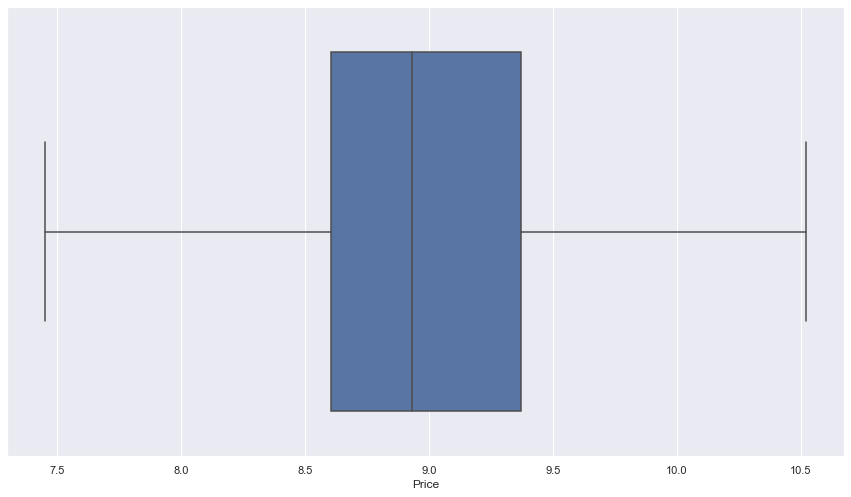

In [44]:
sns.boxplot(df1['Price'])

In [45]:
df1.loc[df1['duration']==0]
    


,Price,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,Airline1,Airline2,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
1898,9.439784,E,Kolkata,2,Goa,2,0,6,20,Evening_flight,8,Air India,Air India,20,30,20,30
2013,9.488654,E,Kolkata,2,Chandigarh,2,0,6,20,Evening_flight,8,Air India,Air India,20,45,20,45
3430,9.511037,E,Indore,2,Chennai,2,0,6,17,Evening_flight,4,Air India,Air India,17,5,17,5
3840,9.321166,E,Raipur,2,Hyderabad,3,0,6,18,Evening_flight,4,Air India,Air India,18,55,18,55
5056,9.364434,E,Bengaluru,3,Nagpur,3,0,0,7,Morning_flight,17,IndiGo,Air India,7,40,7,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329420,8.734238,PE,Mumbai,28,Amritsar,1,0,4,20,Evening_flight,8,Spicejet,Spicejet,20,50,20,50
330273,8.925321,PE,Goa,29,Bagdogra,1,0,5,15,Afternoon_flight,18,Spicejet,Spicejet,15,0,15,0
330564,9.141847,PE,Port Blair,29,New Delhi,1,0,5,8,Morning_flight,8,Spicejet,Spicejet,8,45,8,45
330565,9.141847,PE,Port Blair,29,New Delhi,1,0,5,9,Morning_flight,9,Spicejet,Spicejet,9,50,9,50


In [46]:
duration_col = df1.duration
duration_col.replace(to_replace=0 , value=duration_col.mean(), inplace=True)


In [47]:
df1[df1.duration==0]

,Price,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,Airline1,Airline2,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins


Duration cannot be 0, hence there needs to be a way to make the duration be an ideal number

In [48]:
from scipy import stats
modal_values=pd.DataFrame(df1.groupby(['Airline1','Airline2','Dept_city','arrival_city'], as_index=False)['duration'].agg(lambda x: stats.mode(x)[0] if stats.mode(x)[0]>0 else stats.mode(x)[1]))
modal_values


,Airline1,Airline2,Dept_city,arrival_city,duration
0,Air India,AirAsia,Amritsar,Bagdogra,1200.0
1,Air India,AirAsia,Amritsar,Bhubaneswar,1095.0
2,Air India,AirAsia,Amritsar,Guwahati,395.0
3,Air India,AirAsia,Amritsar,Indore,345.0
4,Air India,AirAsia,Amritsar,Kochi,515.0
...,...,...,...,...,...
6947,flybig,IndiGo,Guwahati,Raipur,825.0
6948,flybig,IndiGo,Guwahati,Ranchi,810.0
6949,flybig,IndiGo,Indore,Varanasi,915.0
6950,flybig,Spicejet,Guwahati,Bagdogra,380.0


In [61]:
data=df1.copy()
for index,row in data.iterrows():
    if row['duration']==0:
    c= modal_values.loc[(modal_values['Airline1']==row['Airline1']) & (modal_values['Airline2']==row['Airline2']) & (modal_values["Dept_city"]==row["Dept_city"]) & (modal_values["arrival_city"] == row["arrival_city"])]['duration']
    data['duration'].iloc[index]=c

IndentationError: expected an indented block (<ipython-input-61-6fd2cce01caa>, line 4)

# Splitting data

In [ ]:
target = data['optimal_hours']
data.drop(columns = ['optimal_hours'], inplace = True)
train_X, test_X, train_y, test_y = train_test_split(data, target, test_size = 0.20, random_state = 0)

# Featuring Engineering

In [ ]:
features = []
for i in df1.columns:
    if df1[i].dtypes == 'object':
        features.append(i)
features

In [ ]:
le = LabelEncoder()

for i in features:
    data[i] = le.fit_transform(data[i])

In [ ]:
# Standardizing Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
for i in data.columns:
    data[i] = scaler.fit_transform(data[[i]])
    # sns.kdeplot(train1[i])

In [ ]:
a = data.columns
a

In [ ]:
x = data.loc[:, a].values

In [ ]:
data.shape

In [ ]:
pca = PCA(n_components=16).fit(x)
new_df = pca.transform(x)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 17, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 15, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


In [ ]:
pca = PCA(n_components=12)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents)
principalDataframe